In [1]:
using ForwardDiff
using Turing
using Plots
using LinearAlgebra
using StatsPlots
using Optim
using Distributions

In [2]:
n_data = 2000
true_m = [1.0, 2.0]
true_c = [0.3 0.0; 0.0 0.5]
data = rand(MvNormal(true_m, true_c), n_data)

2×2000 Matrix{Float64}:
 1.49606  1.5507   0.224355  0.423313  …  1.11918  0.678561  0.974923
 1.98536  2.84826  1.63079   2.88836      2.51582  2.43687   2.65611

In [3]:
function get_mean_loss(m1, m2, s1, s2)
    theory = rand(MvNormal([m1, m2], [s1 0; 0 s2]), n_data)
    loss = mean(@.(data-theory))
    return loss
end;

In [4]:
get_mean_loss(1, 2, 1, 1)

0.013337195696197764

In [5]:
get_mean_loss(5, -1, 1, 2)

-0.5114453111657464

In [14]:
@model function model(data)
    m1 ~ Uniform(-3.0, 3.0)
    m2 ~ Uniform(-3.0, 3.0)
    for i in 1:n_data
        data[:,i] = [m1, m2]
    end
end;

In [15]:
map_estimate = optimize(model(data), MAP(), NelderMead())

ModeResult with maximized lp of -3.58
2-element Named Vector{Float64}
A   │ 
────┼─────────
:m1 │ 0.910105
:m2 │ -2.62792

In [16]:
iterations = 5000
nadapts = 1000
new_chain = sample(model(data), MH(), iterations,
                   nadapt=nadapts, progress=true; save_state=true);

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05


In [17]:
describe(new_chain)[1]

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

          m1    0.0158    1.7422     0.0246    0.0258   4712.3895    1.0000    ⋯
          m2   -0.0075    1.7300     0.0245    0.0229   5090.1776    0.9999    ⋯
                                                                1 column omitted


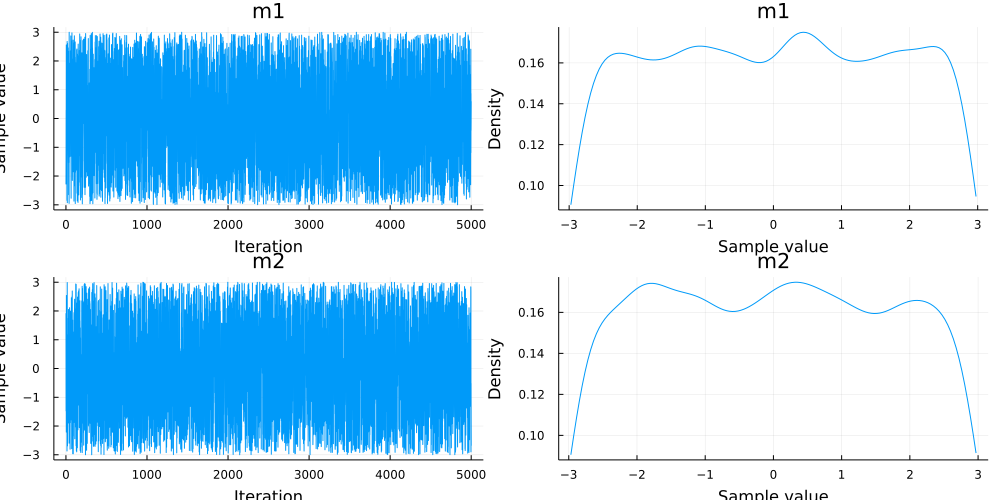

In [18]:
plot(new_chain)

In [11]:
iterations = 1000
adaptation = 100
TAP = 0.6

new_chain = sample(model(data), NUTS(adaptation, TAP),
            iterations, progress=true; save_state=true)

LoadError: ArgumentError: the right-hand side of a `~` must be a `Distribution` or an array of `Distribution`s

In [12]:
describe(new_chain)[1]

LoadError: UndefVarError: new_chain not defined

In [13]:
plot(new_chain)

LoadError: UndefVarError: new_chain not defined